In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

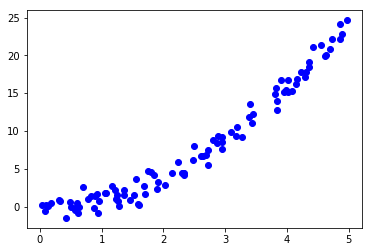

In [2]:
x_data = np.random.uniform(0, 5, size=[100,1])
y_data = (x_data + 0.05 * np.random.normal(size=[100,1]))**2 + np.random.normal(size=[100,1])

_ = plt.plot(x_data, y_data, "bo")

# Single-variable regression Model `with Hidden layer`

![](data/regression_h.png)

In [3]:
X = tf.placeholder(tf.float32, shape=[None,1])
Y = tf.placeholder(tf.float32, shape=[None,1])

W0 = tf.Variable(tf.random_normal([1,5]), dtype=tf.float32)
b0 = tf.Variable(tf.random_normal([5]), dtype=tf.float32)

H0 = tf.nn.sigmoid(tf.matmul(X,W0)+b0)

W1 = tf.Variable(tf.random_normal([5,1]), dtype=tf.float32)
b1 = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

H = tf.matmul(H0,W1)+b1

In [4]:
loss = tf.reduce_mean(tf.square(H-Y))

train = tf.train.GradientDescentOptimizer(learning_rate = 0.05).minimize(loss)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

Step : 100, Cost : 5.50241
Step : 200, Cost : 3.41029
Step : 300, Cost : 2.72072
Step : 400, Cost : 2.40515
Step : 500, Cost : 2.20308
Step : 600, Cost : 2.04511
Step : 700, Cost : 1.91177
Step : 800, Cost : 1.79972
Step : 900, Cost : 1.70764
Step : 1000, Cost : 1.63316


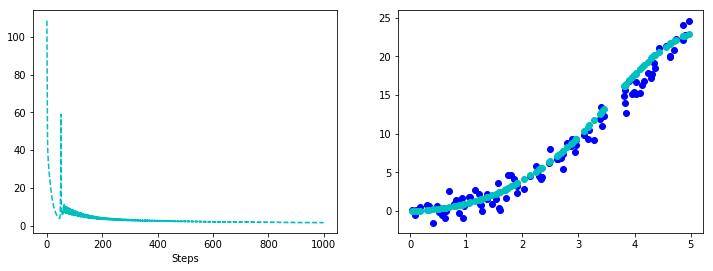

In [5]:
cost_list = []

iteration = 1000
for step in range(iteration):
    _, cost = sess.run([train, loss], feed_dict={X: x_data, Y: y_data})
    cost_list.append(cost)
    if (step+1) % (iteration//10) ==0 :
        print("Step : %i, Cost : %s" %((step+1), cost))
        
prediction = sess.run(H, feed_dict={X: x_data})

plt.figure(figsize=(12,9))     
plt.subplot(221)
plt.xlabel("Steps")
_ = plt.plot(cost_list, "c--")

plt.subplot(222)
_ = plt.plot(x_data, y_data, "bo")
_ = plt.plot(x_data, prediction, "co")